<span style="color:orange;font-size:20px"><b> Import </b></span><br>

!pip install -r ./requirements.txt

In [4]:
# Base
import numpy as np
import pandas as pd
import keras_tuner as kt

# ML
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree

# DL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Plot
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

import random

<span style="color:orange;font-size:20px"><b> Data </b></span><br>

In [5]:
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)
random.seed(seed)

In [6]:
df_train = np.load("../data/train.npz")
X_train = df_train['arr_0']
y_train = df_train['arr_1']

df_test = np.load("../data/test.npz")
X_test = df_test['arr_0']
y_test = df_test['arr_1']

<span style="color:orange;font-size:20px"><b> Exploratory Data Analysis  </b></span><br>

In [7]:
print('train:', X_train.shape, y_train.shape, '\n test:', X_test.shape, y_test.shape)

train: (4000, 8, 3) (4000,) 
 test: (1000, 8, 3) (1000,)


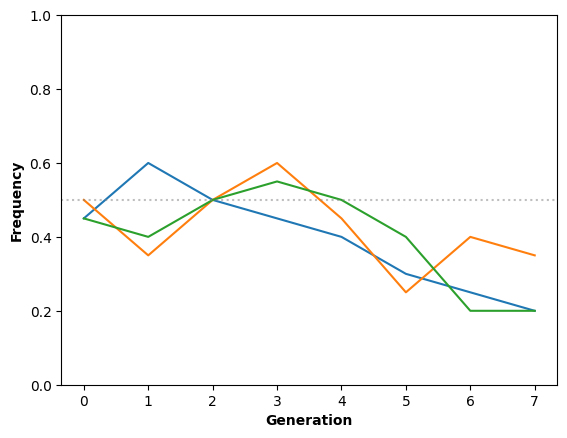

In [8]:
plt.plot(X_test[0])
plt.axhline(0.5, alpha=.5, linestyle='dotted', c='gray')
plt.ylabel('Frequency', fontweight='bold')
plt.xlabel('Generation', fontweight='bold')
plt.ylim([0, 1])
plt.show()

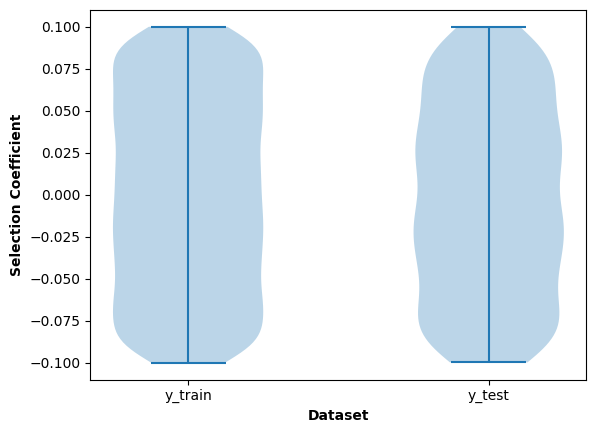

In [9]:
data = [y_train, y_test]

plt.violinplot(data)
plt.xticks([1, 2], ['y_train', 'y_test'])
plt.ylabel('Selection Coefficient', fontweight='bold')
plt.xlabel('Dataset', fontweight='bold')
plt.show()


<span style="color:orange;font-size:20px"><b> Create Neural Network  </b></span><br>

In [10]:
model = keras.Sequential([
    # Input Layer + Flatten
    keras.layers.Input((8, 3)),
    keras.layers.Flatten(),
    
    # Hidden Layers (output=activation(input⋅weights+bias)
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),

    # Output Layer
    keras.layers.Dense(1, activation='linear')
])

# Optimizer
optimizer = keras.optimizers.SGD() # Most common: Adam & SGD
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

model.summary()


I0000 00:00:1750924573.492913   11747 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-06-26 08:56:13.493623: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 24)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         1,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,985 (39.00 KB)

 Trainable params: 9,985 (39.00 KB)

 Non-trainable params: 0 (0.00 B)

![HAHA](./activation_functions.png)

In [12]:
keras.backend.clear_session()

def build_model( num_layers, num_neurons):
    model = keras.Sequential()
    
    # Input Layer + Flatten
    model.add( layers.Input((8, 3)) ),
    model.add( layers.Flatten() )

    # Hidden Layers
    for _ in range(int(num_layers)):
        model.add(layers.Dense(int(num_neurons), activation='relu'))

    # Output Layer
    model.add(layers.Dense(1, activation='linear'))

    optimizer = keras.optimizers.Adam()
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])
    
    return model

In [13]:
model   = build_model(1, 32)
history = model.fit( X_train, y_train, epochs=100, shuffle = True, validation_split=0.2)

Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1933 - mae: 0.3248 - val_loss: 0.0068 - val_mae: 0.0663
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0057 - mae: 0.0600 - val_loss: 0.0045 - val_mae: 0.0535
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0041 - mae: 0.0499 - val_loss: 0.0035 - val_mae: 0.0465
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0032 - mae: 0.0444 - val_loss: 0.0028 - val_mae: 0.0419
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0027 - mae: 0.0405 - val_loss: 0.0024 - val_mae: 0.0381
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0023 - mae: 0.0370 - val_loss: 0.0020 - val_mae: 0.0346
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0020 - mae: 0.0338 - val_loss: 0.0017 - val_mae: 0.0315
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0017 - mae: 0.0308 - val_loss: 0.0014 - val_mae: 0.0286
Epoch 9/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 24)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │           800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,501 (9.77 KB)

 Trainable params: 833 (3.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,668 (6.52 KB)

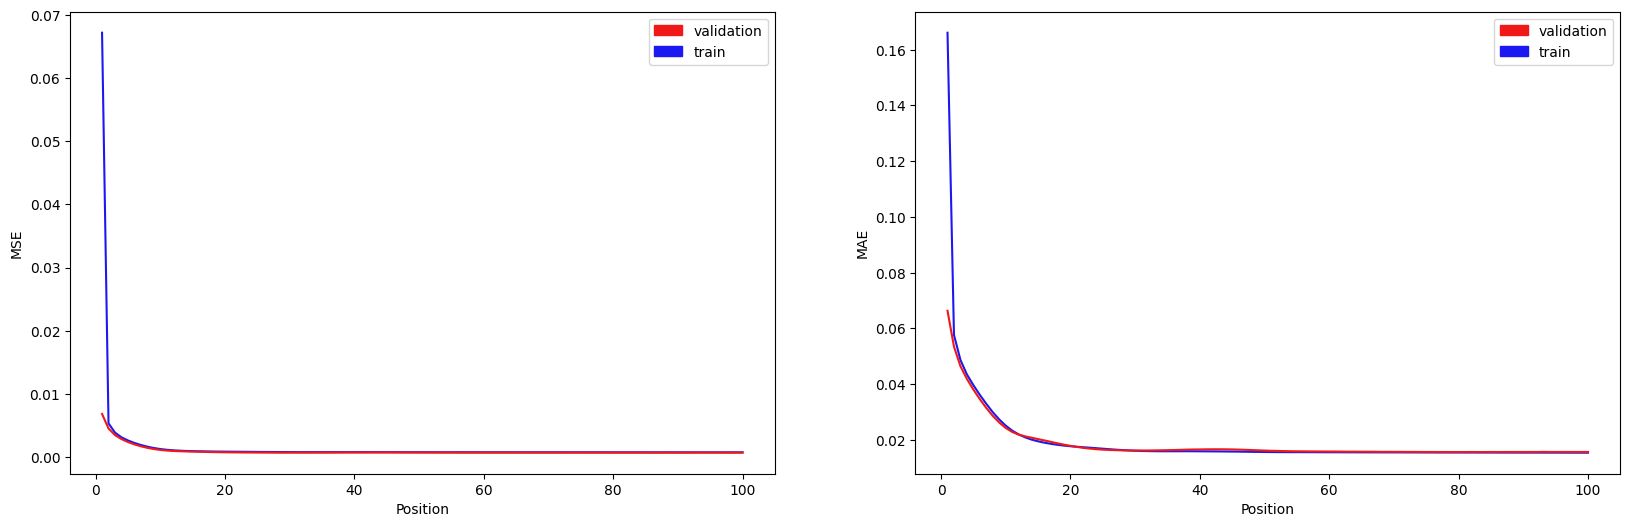

In [21]:
val = mpatches.Patch(color='#F11818', label='validation')
trn = mpatches.Patch(color='#1C18F1', label='train')

# Access the training history
loss     = history.history['loss']
acc      = history.history['mae']
val_loss = history.history['val_loss']
val_acc  = history.history['val_mae']
epochs   = range(1, 101)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
axes[0].plot(epochs, loss, '#1C18F1')
axes[0].plot(epochs, val_loss, '#F11818')
axes[0].set_xlabel('Position')
axes[0].set_ylabel('MSE')
axes[0].legend(handles=[val, trn])

axes[1].plot(epochs, acc, '#1C18F1')
axes[1].plot(epochs, val_acc, '#F11818')
axes[1].set_xlabel('Position')
axes[1].set_ylabel('MAE')
axes[1].legend(handles=[val, trn])

plt.show()

In [16]:
df_test = np.load("../data/test.npz")
X_test = df_test['arr_0']
y_test = df_test['arr_1']

y_pred = model.predict(X_test)
print(y_pred[:5])

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[-0.01789084]
 [-0.07745329]
 [-0.04015282]
 [-0.08775726]
 [ 0.02697629]]


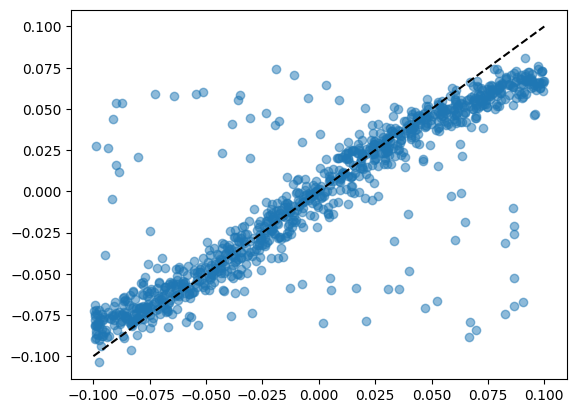

In [17]:
plt.scatter(y_test, y_pred, alpha=.5)
plt.plot([-0.1, 0.1], [-0.1, 0.1], c="black", linestyle="dashed")

In [92]:
#np.save('./preds.npy', y_pred)

In [12]:
aa = np.load('../data/preds.npy')

In [13]:
y_pred.shape

(1000, 1)

In [15]:
np.corrcoef(y_pred.reshape(1000), y_test)

array([[1.        , 0.75779881],
       [0.75779881, 1.        ]])

<span style="color:orange;font-size:20px"><b> Improvements?  </b></span><br>

In [7]:
def build_model(hp):
    """
    Build and compile a Keras model using hyperparameters from Keras Tuner.

    Parameters:
        hp (HyperParameters): Object containing hyperparameter search space.

    Returns:
        keras.Model: Compiled model.
    """
    model = keras.Sequential()
    model.add(layers.Input((8, 3)))
    model.add(layers.Flatten())

    # Tune the number of layers
    for i in range(hp.Int("num_layers", 1, 5)):
        model.add(layers.Dense(
            units=hp.Int(f"units_{i}", min_value=16, max_value=128, step=16),
            activation="relu"
        ))

    model.add(layers.Dense(1, activation="linear"))

    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Float("learning_rate", 1e-4, 1e-2, sampling="log")
        ),
        loss="mse",
        metrics=["mae"]
    )

    return model


In [8]:
tuner = kt.BayesianOptimization(
    build_model,
    objective="val_loss",
    max_trials=50,
    executions_per_trial=1,
    directory="tuner_logs",
    project_name="bayesian_opt"
)

Reloading Tuner from tuner_logs/bayesian_opt/tuner0.json


In [9]:
df_train = np.load("./train.npz")
X_train = df_train['arr_0']
y_train = df_train['arr_1']

In [10]:
tuner.search(
    X_train, y_train,
    epochs=20,
    validation_split=0.2,
    batch_size=32,
    verbose=1
)

In [ ]:
best_hps = tuner.get_best_hyperparameters(1)[0]
print("Best hyperparameters:")
print(best_hps.values)

best_model = tuner.hypermodel.build(best_hps)
best_model.fit(X_train, y_train, epochs=20, validation_split=0.2)

Best hyperparameters:
{'num_layers': 5, 'units_0': 64, 'learning_rate': 0.005593833508156011, 'units_1': 80, 'units_2': 16, 'units_3': 16, 'units_4': 16}
Epoch 1/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0010 - mae: 0.0211 - val_loss: 7.3359e-04 - val_mae: 0.0153
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 662us/step - loss: 8.1526e-04 - mae: 0.0173 - val_loss: 7.2585e-04 - val_mae: 0.0149
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 675us/step - loss: 7.9463e-04 - mae: 0.0168 - val_loss: 9.4021e-04 - val_mae: 0.0196
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 661us/step - loss: 7.5735e-04 - mae: 0.0162 - val_loss: 7.8663e-04 - val_mae: 0.0170
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 871us/step - loss: 7.3313e-04 - mae: 0.0156 - val_loss: 7.7223e-04 - val_mae: 0.0167
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 849us/step - loss: 7.0565e-04 - mae: 0.0154 - val_loss: 7.7134e-04 - val_mae: 0.0159
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 719us/step - loss: 7.7418e-04 - mae: 0.01

In [18]:
best_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 24)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │         1,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 80)             │         5,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 16)             │         1,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,973 (101.46 KB)

 Trainable params: 8,657 (33.82 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,316 (67.64 KB)

In [19]:
df_test = np.load("./test.npz")
X_test = df_test['arr_0']
y_test = df_test['arr_1']

best_model = tuner.hypermodel.build(best_hps)
best_model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

y_pred = best_model.predict(X_test)
print(y_pred[:5])

Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 876us/step - loss: 0.0012 - mae: 0.0228 - val_loss: 8.5886e-04 - val_mae: 0.0175
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 711us/step - loss: 7.9268e-04 - mae: 0.0176 - val_loss: 7.6650e-04 - val_mae: 0.0164
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step - loss: 7.6213e-04 - mae: 0.0169 - val_loss: 7.7295e-04 - val_mae: 0.0170
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step - loss: 7.3784e-04 - mae: 0.0158 - val_loss: 7.3998e-04 - val_mae: 0.0141
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 634us/step - loss: 7.5807e-04 - mae: 0.0160 - val_loss: 7.5874e-04 - val_mae: 0.0152
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step - loss: 7.4222e-04 - mae: 0.0162 - val_loss: 8.0562e-04 - val_mae: 0.0183
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step - loss: 7.6425e-04 - mae: 0.0159 - val_loss: 7.9711e-04 - val_mae: 0.0167
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step - loss: 7.7240e-04 - mae: 0.0165 - val_loss: 7.3664e-0

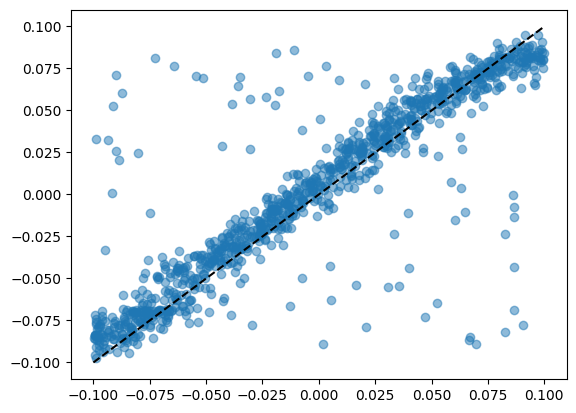

In [20]:
plt.scatter(y_test, y_pred, alpha=.5)
plt.plot([-0.1, 0.1], [-0.1, 0.1], c="black", linestyle="dashed")